In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('dataset/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
df.shape

(28242, 7)

In [9]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


# removing duplicates

In [11]:
df.duplicated().sum()

2310

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(25932, 7)

In [15]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [17]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [18]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [20]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [23]:
df = df.drop(to_drop)

In [24]:
df.shape

(25932, 7)

In [25]:
#graph of freq vs area

<Axes: xlabel='count', ylabel='Area'>

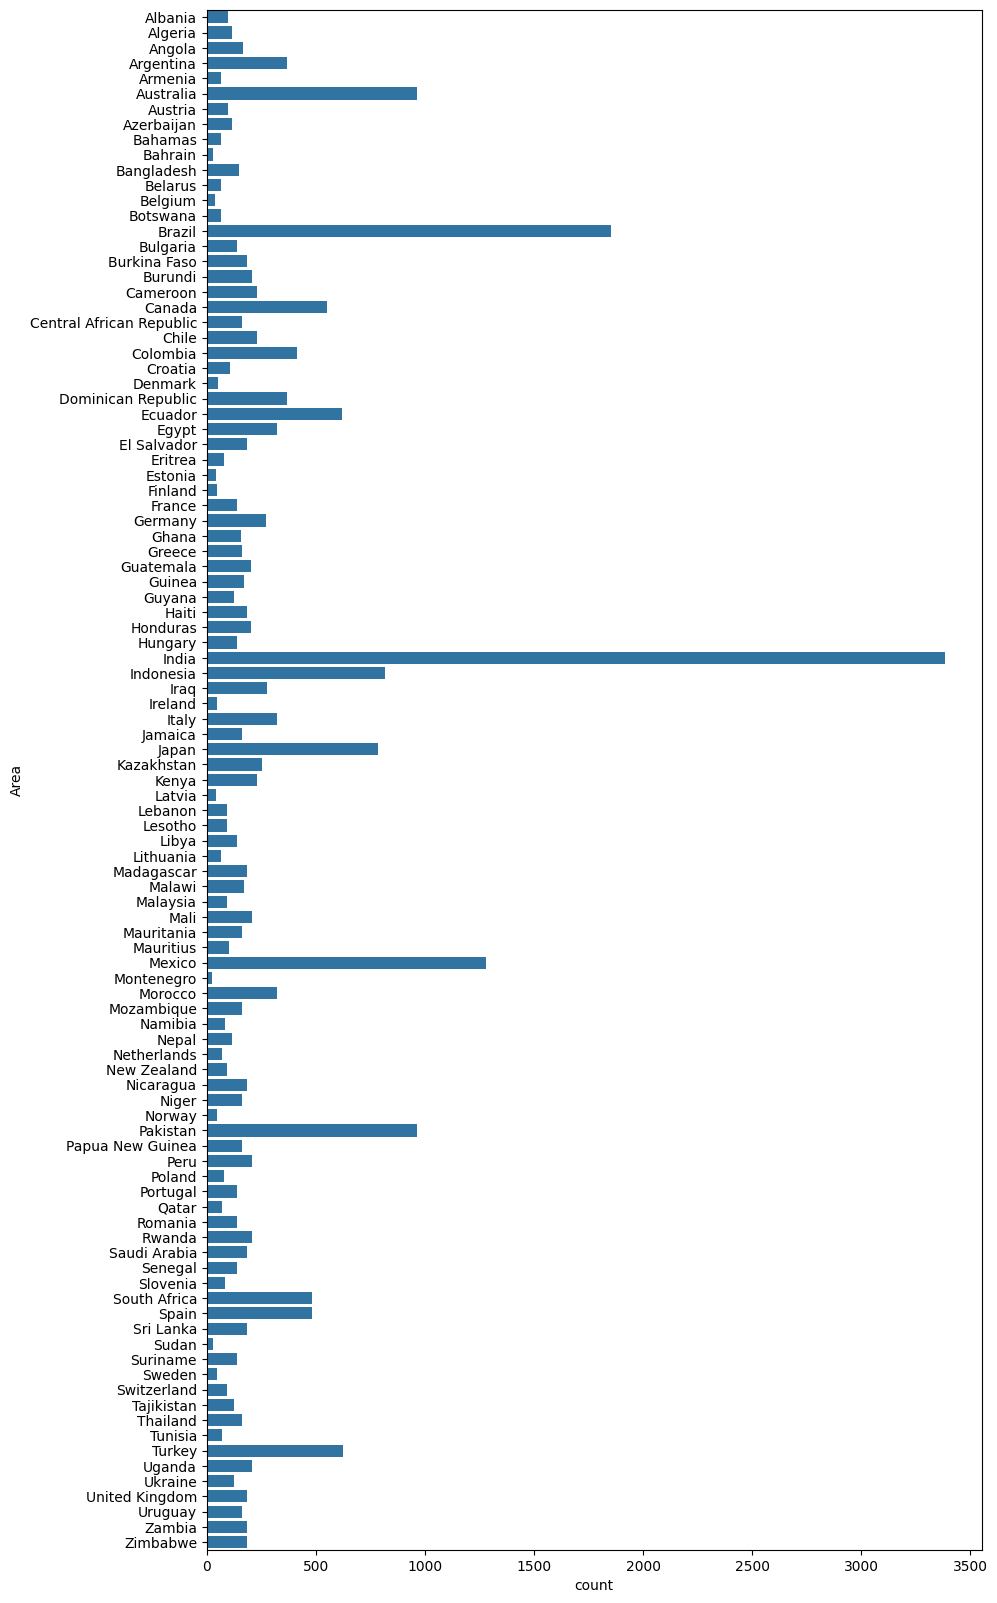

In [28]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

In [51]:
countries = df['Area'].unique()
countries

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [49]:
yield_per_country = {}

In [52]:
for country in countries:
    yield_per = df[df['Area']==country]['hg/ha_yield'].sum()
    yield_per_country[country] = yield_per
print(yield_per_country)    

{'Albania': 5711536, 'Algeria': 6711464, 'Angola': 5722563, 'Argentina': 32864032, 'Armenia': 4524100, 'Australia': 109111062, 'Austria': 10852258, 'Azerbaijan': 4608380, 'Bahamas': 4384717, 'Bahrain': 4443889, 'Bangladesh': 7720159, 'Belarus': 4704812, 'Belgium': 8442270, 'Botswana': 470651, 'Brazil': 136340329, 'Bulgaria': 6263075, 'Burkina Faso': 6083337, 'Burundi': 7031146, 'Cameroon': 10717883, 'Canada': 34706922, 'Central African Republic': 4255627, 'Chile': 20561214, 'Colombia': 26927138, 'Croatia': 6083167, 'Denmark': 10701651, 'Dominican Republic': 25312166, 'Ecuador': 21315591, 'Egypt': 36828848, 'El Salvador': 16855944, 'Eritrea': 1452416, 'Estonia': 3595638, 'Finland': 6210668, 'France': 15790618, 'Germany': 38780463, 'Ghana': 9260371, 'Greece': 14571925, 'Guatemala': 16508723, 'Guinea': 7975743, 'Guyana': 8361103, 'Haiti': 8619194, 'Honduras': 10920131, 'Hungary': 8824110, 'India': 274219558, 'Indonesia': 68067328, 'Iraq': 10984722, 'Ireland': 9104030, 'Italy': 32280700, '

In [53]:
# Graph of yield per country

In [54]:
df_yield = pd.DataFrame(list(yield_per_country.items()),columns=['country','yield_per'])
df_yield.head()

,country,yield_per
0,Albania,5711536
1,Algeria,6711464
2,Angola,5722563
3,Argentina,32864032
4,Armenia,4524100


<Axes: xlabel='yield_per', ylabel='country'>

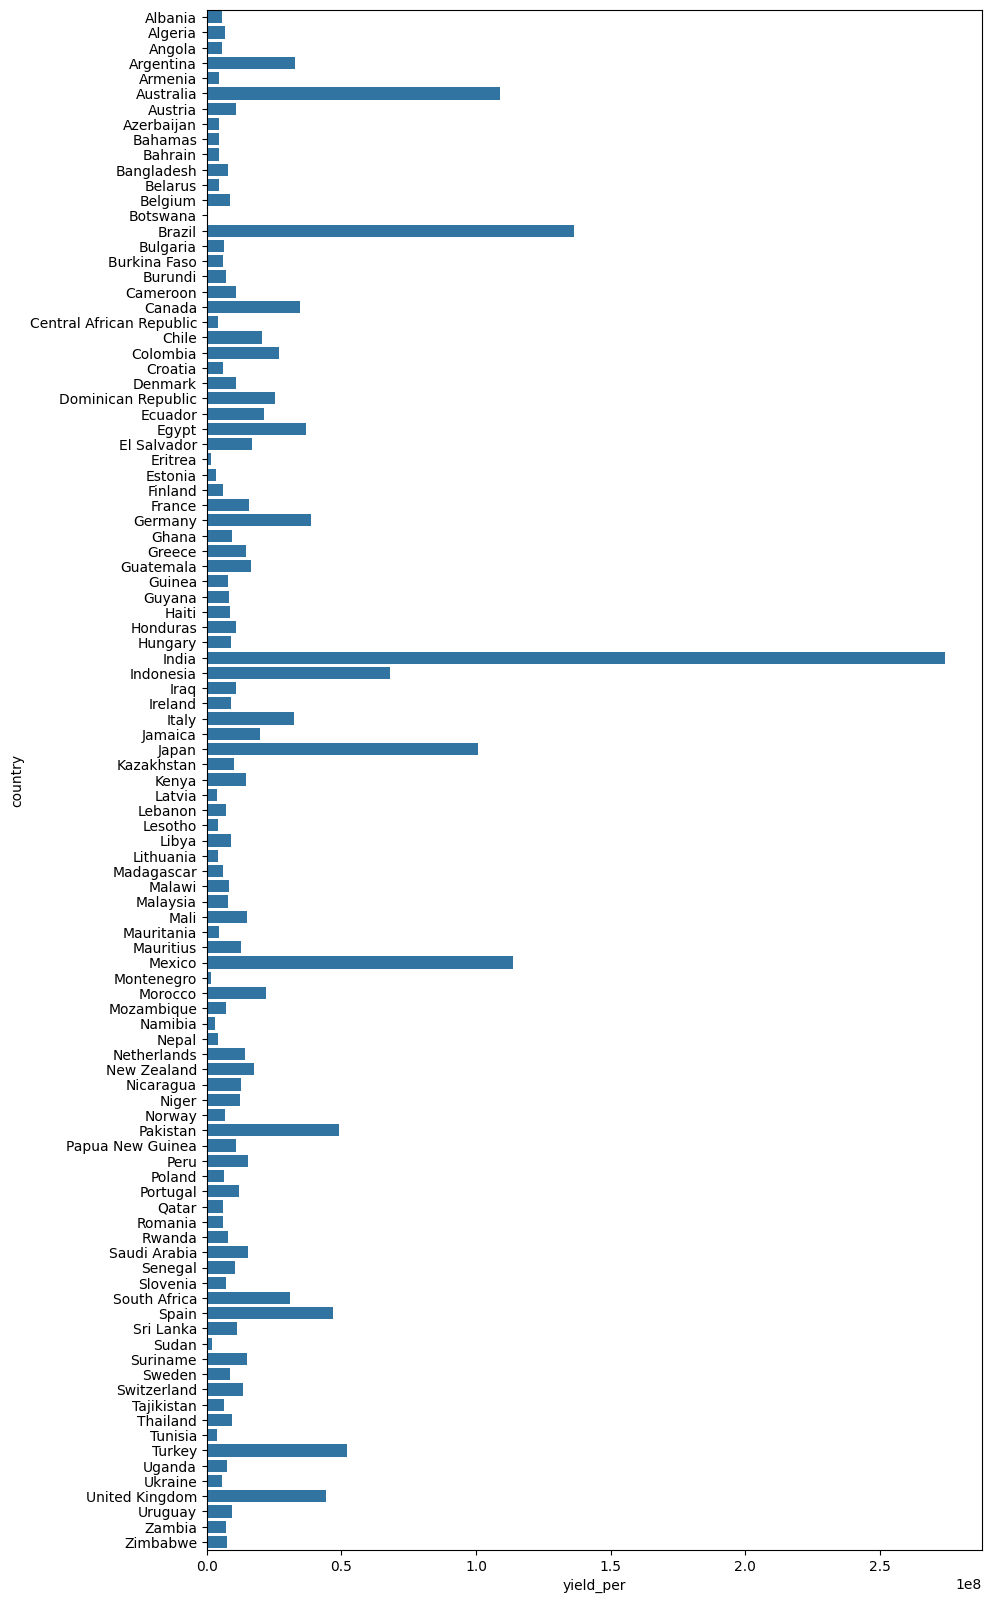

In [64]:
plt.figure(figsize=(10,20))
sns.barplot(y=df_yield['country'], x=df_yield['yield_per'])


<Axes: xlabel='count', ylabel='Item'>

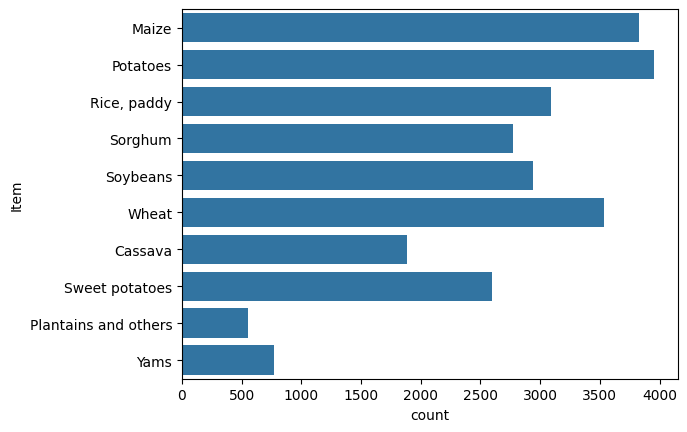

In [65]:
sns.countplot(y=df['Item'])

In [ ]:
#yield vs Item

In [68]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [69]:
crops = df['Item'].unique()
yield_per_item = {}

In [70]:
for crop in crops:
    yield_per = df[df['Item']==crop]['hg/ha_yield'].sum()
    yield_per_item[crop] = yield_per
print(yield_per_item)

{'Maize': 142020761, 'Potatoes': 785921609, 'Rice, paddy': 127646024, 'Sorghum': 52906376, 'Soybeans': 49957039, 'Wheat': 106614786, 'Cassava': 275132269, 'Sweet potatoes': 310269345, 'Plantains and others': 58958974, 'Yams': 86769760}


In [73]:
df_item = pd.DataFrame(list(yield_per_item.items()), columns=['Crops','yields'])
df_item.head(2)

,Crops,yields
0,Maize,142020761
1,Potatoes,785921609


<Axes: xlabel='yields', ylabel='Crops'>

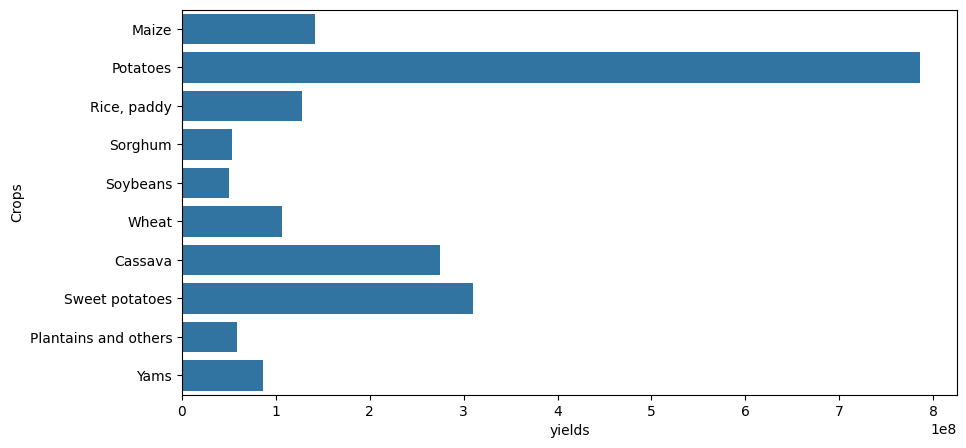

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(y=df_item['Crops'],x=df_item['yields'])

In [80]:
# placing target column at the end
df['hg/ha_yield'] = df.pop('hg/ha_yield')
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [81]:
X = df.drop('hg/ha_yield', axis=1)
X.head(2)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37


In [82]:
y = df['hg/ha_yield']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [85]:
X_test.shape

(5187, 6)

In [86]:
# Converting categorical columns into Numerical

In [87]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [88]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [89]:
X_train.head(2)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55
9468,Greece,Sweet potatoes,2012,652.0,8002.20,18.82


In [90]:
preprocessor = ColumnTransformer(transformers=[
        ('onehotencoder',ohe,[0,1]),
        ('scaler',scaler,[2,3,4,5])
    
] ,
remainder='passthrough'
 )

In [91]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [0, 1]),
                                ('scaler', StandardScaler(), [2, 3, 4, 5])])

In [92]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [93]:
X_test_transformed

<5187x113 sparse matrix of type '<class 'numpy.float64'>'
	with 30727 stored elements in Compressed Sparse Row format>

In [94]:
#Model Training

In [99]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [97]:
models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'Ridge': Ridge(),
    'knn': KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}

In [100]:
for name,mod in models.items():
    mod.fit(X_train_transformed,y_train)
    y_pred = mod.predict(X_test_transformed)
    print(f"{name} MSE: {mean_absolute_error(y_test,y_pred)} Score {r2_score(y_test,y_pred)}")

lr MSE: 29920.766662551552 Score 0.748656698904753


C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss MSE: 29907.604370717872 Score 0.7485842229351424
Ridge MSE: 29875.46701200635 Score 0.7485417911819948
knn MSE: 4854.222325043377 Score 0.9824139991265859
dtr MSE: 4150.671293618662 Score 0.9769232632837122


In [115]:
#Select model that is Decison Tree
#Note Decison Tree doesnot require scaling and standarization
dtr = DecisionTreeRegressor()
dtr.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [106]:
X_train.columns

Index(['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [123]:
def prediction(Area, Item, Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp):
    features = np.array([[Area, Item, Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp]])
    transformed = preprocessor.transform(features)
    predicted_value = dtr.predict(transformed).reshape(1,-1)
    return predicted_value[0]
    
    



In [124]:
result = prediction('Saudi Arabia', 'Sorghum', 2000, 59.0, 3024.11, 26.55 )
print(result)

[13384.]


C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [126]:
# Extracting models
import pickle
pickle.dump(dtr, open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [128]:
import sklearn
sklearn.__version__


'1.5.0'